Create a data frame, where each row corresponds to an actor, each column represents a genre, and each cell captures how many times that row’s actor has appeared in that column’s genre

In [18]:
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import json

In [3]:
actor_name_map = {}
movie_actor_map = {}
actor_genre_map = {}


with open("imdb_movies_2000to2022.prolific.json", "r") as in_file:
    for line in in_file:
        
        # Read the movie on this line and parse its json
        this_movie = json.loads(line)
                    
        # Add all actors to the id->name map
        for actor_id,actor_name in this_movie['actors']:
            actor_name_map[actor_id] = actor_name
            
        # For each actor, add this movie's genres to that actor's list
        for actor_id,actor_name in this_movie['actors']:
            this_actors_genres = actor_genre_map.get(actor_id, {})
            
            # Increment the count of genres for this actor
            for g in this_movie["genres"]:
                this_actors_genres[g] = this_actors_genres.get(g, 0) + 1
                
            # Update the map
            actor_genre_map[actor_id] = this_actors_genres
            
        # Finished with this film
        movie_actor_map[this_movie["imdb_id"]] = ({
            "movie": this_movie["title"],
            "actors": set([item[0] for item in this_movie['actors']]),
            "genres": this_movie["genres"]
        })

In [4]:
actor_genre_map['nm0413168']

{'Comedy': 7,
 'Fantasy': 3,
 'Romance': 5,
 'Action': 14,
 'Adventure': 11,
 'Sci-Fi': 10,
 'Crime': 6,
 'Thriller': 2,
 'Animation': 4,
 'Drama': 12,
 'Mystery': 5,
 'Biography': 4,
 'Musical': 2,
 'History': 1}

In [7]:
# Get all actors as an index for a dataframe
index = actor_genre_map.keys()

# Get the genre-counts for each actor in the index
rows = [actor_genre_map[k] for k in index]

# Create the data frame from these rows, with the actors as index
df = pd.DataFrame(rows, index=index)

# Fill NAs with zero, as NA means the actor has not starred in that genre
df = df.fillna(0)

df

,Comedy,Fantasy,Romance,Drama,Mystery,Thriller,Action,Biography,Crime,War,...,Horror,Documentary,Sport,News,Family,Music,,Western,Short,Reality-TV
nm0000212,7.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0413168,7.0,3.0,5.0,12.0,5.0,2.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0000630,8.0,2.0,6.0,14.0,2.0,3.0,4.0,5.0,1.0,1.0,...,3.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0005227,10.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
nm0864851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9504284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm10592896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm7216750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0936300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\octav\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\octav\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\octav\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\octav\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

Cluster 0:
nm0852173
nm2740199
nm0522909
nm0416381
nm12239801
Cluster 1:
nm0000514
nm0001595
nm0000185
nm0000616
nm0001002
Cluster 2:
nm0000337
nm2690647
nm0001287
nm1187181
nm1347153
Cluster 3:
nm0249291
nm0004051
nm0000295
nm0045393
nm0000146
Cluster 4:
nm1057928
nm0089217
nm0879085
nm0000421
nm0015001
Cluster 5:
nm1334869
nm0006958
nm0005023
nm0495095
nm5447706
Cluster 6:
nm0000465
nm2028004
nm2028004
nm0124920
nm2781723
Cluster 7:
nm1969169
nm0233079
nm3034501
nm0190497
nm0215487


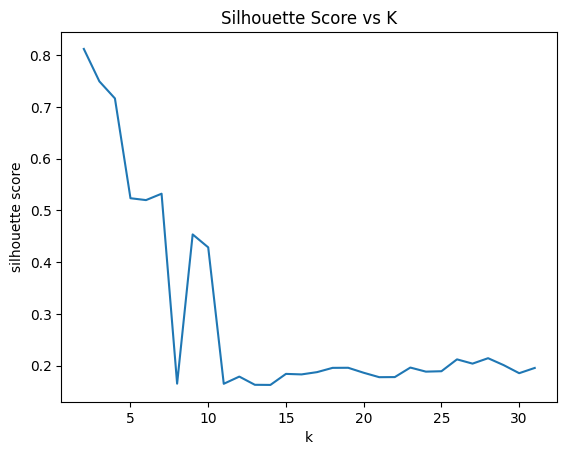

In [20]:
scores = []
for k in range(2, 32):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append((k, score))
  
ks, scores = zip(*scores)
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score vs K')

k = 8
kmeans = KMeans(n_clusters=k).fit(df) 
for i in range(k):
    cluster_df = df[kmeans.labels_==i] 
    print(f'Cluster {i}:') 
    for j in range(5):
        print(cluster_df.sample(1).index[0])